In [ ]:
pip install gdal rasterio

In [2]:
# Import libaries
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import glob
import os
from PIL import Image
from IPython.display import display

In [3]:
"""Searches for a .tif file in the folder that ends with the specific band ID.
Handles 'B04.tif' vs 'B4.tif' and prefixes like 'subset_B04.tif'.
"""
def find_band_file(folder_path, band_id):
    folder = Path(folder_path)
    
    # We look for patterns ending in the band ID + .tif
    # We check standard formatting (B04) and potential short formatting (B4)
    patterns = [
        f"*{band_id}.tif",       # e.g., *B04.tif
        f"*{band_id.lower()}.tif" # Case insensitive check just in case
    ]
    
    # If the band has a leading zero (e.g., B04), also check the single digit version (B4)
    if '0' in band_id:
        short_id = band_id.replace('0', '')
        patterns.append(f"*{short_id}.tif")

    for pattern in patterns:
        files = list(folder.glob(pattern))
        if files:
            # Return the first match found
            return files[0]
            
    return None


"""
Normalizes Sentinel-2 data to 0-1 range for display.
Sentinel-2 reflectance is usually 0-10000. 
We clip at 3000 (0.3 reflectance) which is standard for visualization
to ensure the image isn't too dark.
"""
def normalize(band):
  
    # Avoid division by zero
    if band.max() == 0:
        return band
        
    band_min, band_max = 0, 3000 
    return np.clip((band - band_min) / (band_max - band_min), 0, 1)


In [6]:
def visualize_sentinel_rgb(folder_path):
    print(f"Scanning folder: {folder_path}...")
    
    # Sentinel-2 RGB Bands: Red (B04), Green (B03), Blue (B02)
    band_map = {
        'Red': 'B04',
        'Green': 'B03',
        'Blue': 'B02',
        'red' :'B05'
    }
    
    band_data = {}
    
    # 1. Find and Read Bands
    for color, band_id in band_map.items():
        file_path = find_band_file(folder_path, band_id)
        
        if file_path is None:
            print(f" Error: Could not find a file ending in {band_id}.tif for {color} band.")
            return

        print(f"Found {color} band: {file_path.name}")
        
        with rasterio.open(file_path) as src:
            band_data[color] = src.read(1)

    # 2. Normalize
    red = normalize(band_data['Red'])
    green = normalize(band_data['Green'])
    blue = normalize(band_data['Blue'])
    edge_red = normalize(band_data['red'])

    # 3. Stack (Create RGB Image)
    rgb_composite = np.dstack((red, green, blue, edge_red))
    print(f'Shape of the image: {rgb_composite.shape}')

    # 4. Plot
    plt.figure(figsize=(10, 10))
    plt.imshow(rgb_composite)
    plt.title(f"RGB Composite\nSource: {Path(folder_path).name}")
    plt.axis('off')
    plt.show()

Scanning folder: /kaggle/input/datasets/soumikrakshit/onera-satellite-change-detection-dataset/images/Onera Satellite Change Detection dataset - Images/mumbai/imgs_1_rect...
Found Red band: B04.tif
Found Green band: B03.tif
Found Blue band: B02.tif
Found red band: B05.tif
Shape of the image: (858, 557, 4)


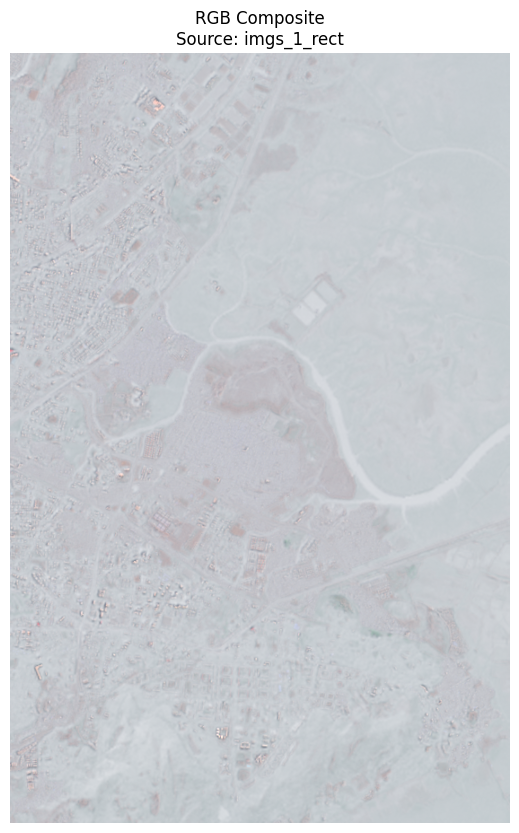

Scanning folder: /kaggle/input/datasets/soumikrakshit/onera-satellite-change-detection-dataset/images/Onera Satellite Change Detection dataset - Images/mumbai/imgs_2_rect...
Found Red band: B04.tif
Found Green band: B03.tif
Found Blue band: B02.tif
Found red band: B05.tif
Shape of the image: (858, 557, 4)


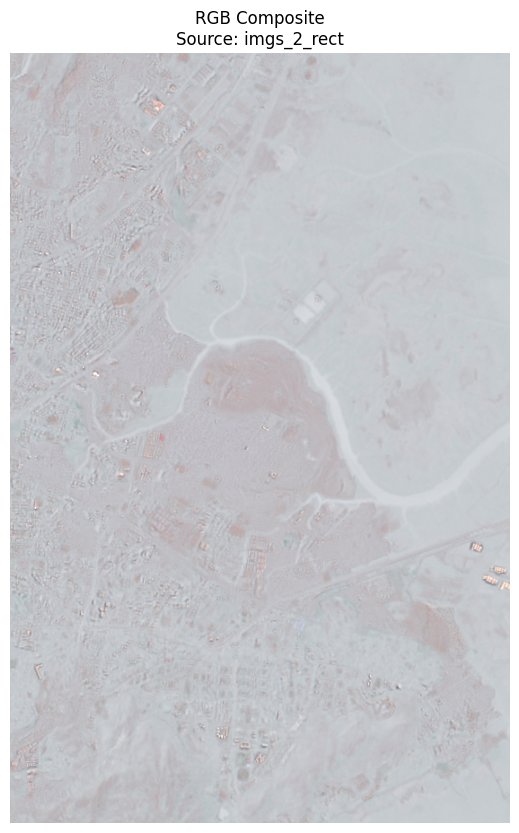

Image opened successfully: PNG, (557, 858), RGBA


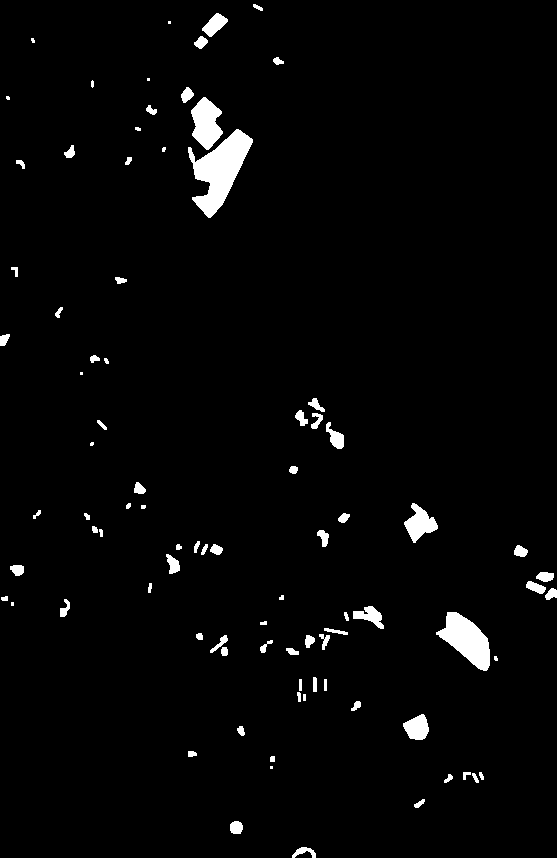

In [7]:
folder_path1 = "/kaggle/input/datasets/soumikrakshit/onera-satellite-change-detection-dataset/images/Onera Satellite Change Detection dataset - Images/mumbai/imgs_1_rect" 
folder_path2 = "/kaggle/input/datasets/soumikrakshit/onera-satellite-change-detection-dataset/images/Onera Satellite Change Detection dataset - Images/mumbai/imgs_2_rect" 

visualize_sentinel_rgb(folder_path1)

visualize_sentinel_rgb(folder_path2)

image_path = "/kaggle/input/datasets/soumikrakshit/onera-satellite-change-detection-dataset/train_labels/Onera Satellite Change Detection dataset - Train Labels/mumbai/cm/cm.png"
img = Image.open(image_path)
print(f"Image opened successfully: {img.format}, {img.size}, {img.mode}")

from IPython.display import display
display(img) 